<a href="https://colab.research.google.com/github/dharani2002/dharani2002/blob/main/Image_Processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

We’ll utilize Python’s scipy.ndimage and skimage libraries to demonstrate the application of mean and median filters on noisy images, comparing their effectiveness using the Peak Signal-to-Noise Ratio (PSNR).

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread
from skimage.color import rgb2gray
from skimage.util import random_noise
from skimage.metrics import peak_signal_noise_ratio as compare_psnr
from scipy.ndimage import uniform_filter, median_filter

We define a function for visualization purposes

In [3]:
def plt_hist(noise, title='Noise Histogram', bins=None):
    plt.grid()
    plt.hist(noise.ravel(), bins=bins, alpha=0.5, color='green')
    plt.tick_params(labelsize=15)
    plt.title(title, size=25)

def plt_images(original_img, noisy_img, denoised_mean_img, denoised_median_img, noise, noise_type):
    fig, axes = plt.subplots(1, 4, figsize=(20, 5))
    ax = axes.ravel()

    ax[0].imshow(original_img, cmap='gray')
    ax[0].set_title('Original', size=20)
    ax[0].axis('off')

    ax[1].imshow(noisy_img, cmap='gray')
    ax[1].set_title(f'Noisy ({noise_type})', size=20)
    ax[1].axis('off')

    ax[2].imshow(denoised_mean_img, cmap='gray')
    ax[2].set_title('Denoised (Mean)', size=20)
    ax[2].axis('off')

    ax[3].imshow(denoised_median_img, cmap='gray')
    ax[3].set_title('Denoised (Median)', size=20)
    ax[3].axis('off')

    plt.figure()
    plt_hist(noise, title=f'{noise_type} Noise Histogram')
    plt.show()

    print(f"PSNR (Original vs Noisy): {compare_psnr(original_img, noisy_img):.3f}")
    print(f"PSNR (Original vs Denoised Mean): {compare_psnr(original_img, denoised_mean_img):.3f}")
    print(f"PSNR (Original vs Denoised Median): {compare_psnr(original_img, denoised_median_img):.3f}")

#Loading the image and converting to Gray scale
image_path = '/content/boarding_pass.jpg'
original_img = rgb2gray(imread(image_path))

For each type of noise, we introduce it to the original image, apply both mean and median filters, and then analyze the results. The mean filter smooths the image by averaging pixel values within a neighbourhood, while the median filter replaces each pixel’s value with the median of the intensity values in its neighbourhood, which is particularly effective against Salt and Pepper noise.

In [4]:
noisy_img = random_noise(original_img, mode='gaussian', var=0.02)

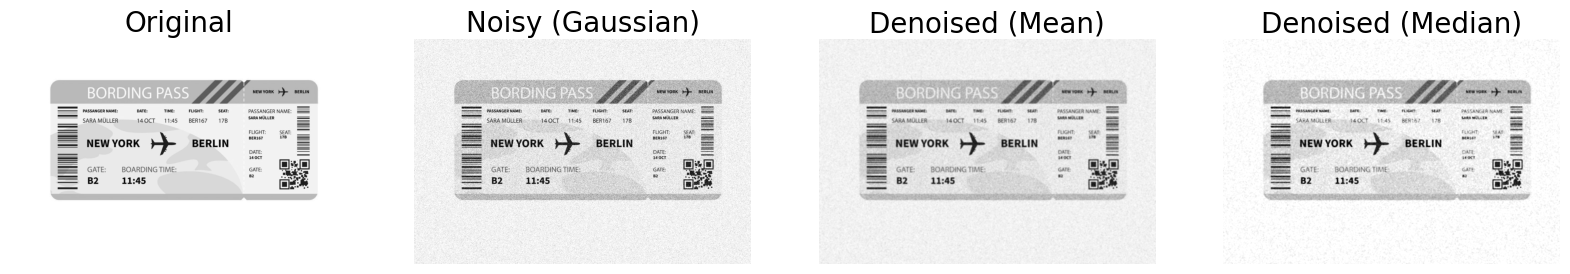

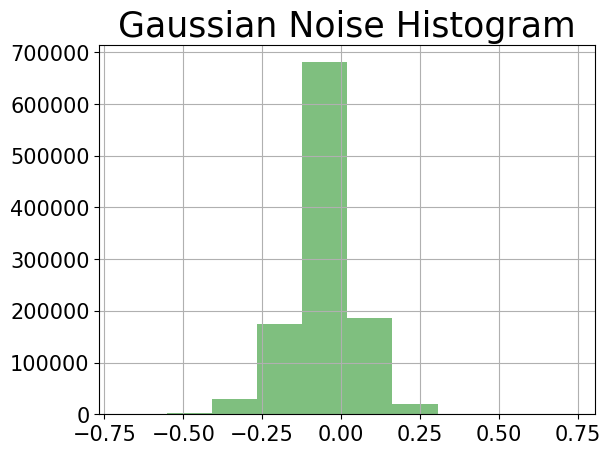

PSNR (Original vs Noisy): 19.249
PSNR (Original vs Denoised Mean): 22.334
PSNR (Original vs Denoised Median): 24.535


In [5]:
denoised_mean_img = uniform_filter(noisy_img, size=5)
denoised_median_img = median_filter(noisy_img, size=5)
plt_images(original_img, noisy_img, denoised_mean_img, denoised_median_img, noisy_img-original_img, 'Gaussian')

In [6]:
noisy_img = random_noise(original_img, mode='s&p', amount=0.05)

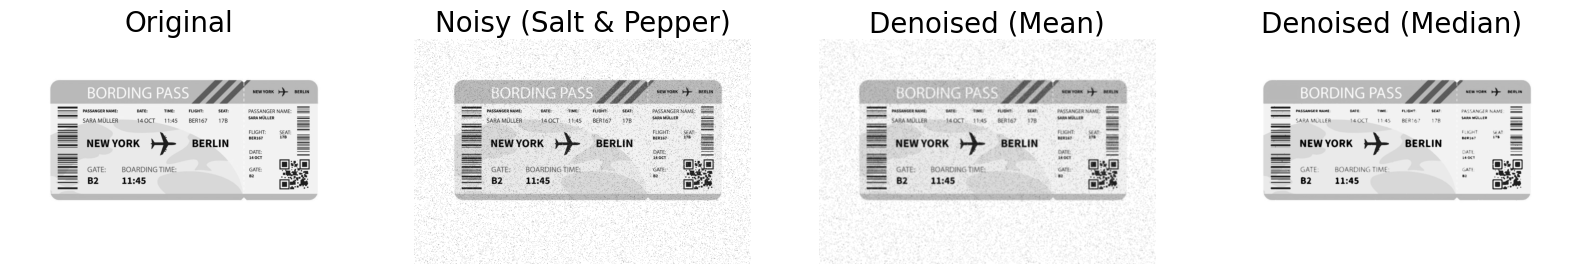

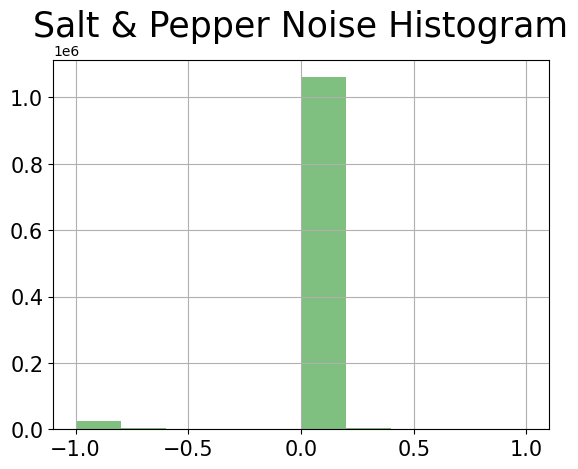

PSNR (Original vs Noisy): 16.465
PSNR (Original vs Denoised Mean): 23.224
PSNR (Original vs Denoised Median): 25.913


In [7]:
denoised_mean_img = uniform_filter(noisy_img, size=5)
denoised_median_img = median_filter(noisy_img, size=5)
plt_images(original_img, noisy_img, denoised_mean_img, denoised_median_img, noisy_img-original_img, 'Salt & Pepper')

Before we delve into histogram equalization, it’s essential to have the right tools and libraries at our disposal. We’ll use Python and its powerful libraries such as NumPy for numerical operations and Matplotlib for visualization, alongside scikit-image for image processing tasks.

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread
from skimage import exposure

In [18]:
def plot_image_and_hist(image, axes, bins=256):
    """Plot an image and its histogram on given axes."""
    axes[0].imshow(image, cmap=plt.cm.gray)
    axes[0].axis('off')

    hist, bins = np.histogram(image.flatten(), bins=bins, range=[0, bins])
    cdf = hist.cumsum()  # Cumulative distribution function
    cdf_normalized = cdf * hist.max() / cdf.max()

    axes[1].plot(cdf_normalized, color='b')
    axes[1].hist(image.flatten(), bins=bins, color='r')
    axes[1].ticklabel_format(axis='y', style='scientific', scilimits=(0, 0))
    axes[1].set_xlabel('Pixel intensity')
    axes[1].legend(('CDF', 'Histogram'), loc='upper left')

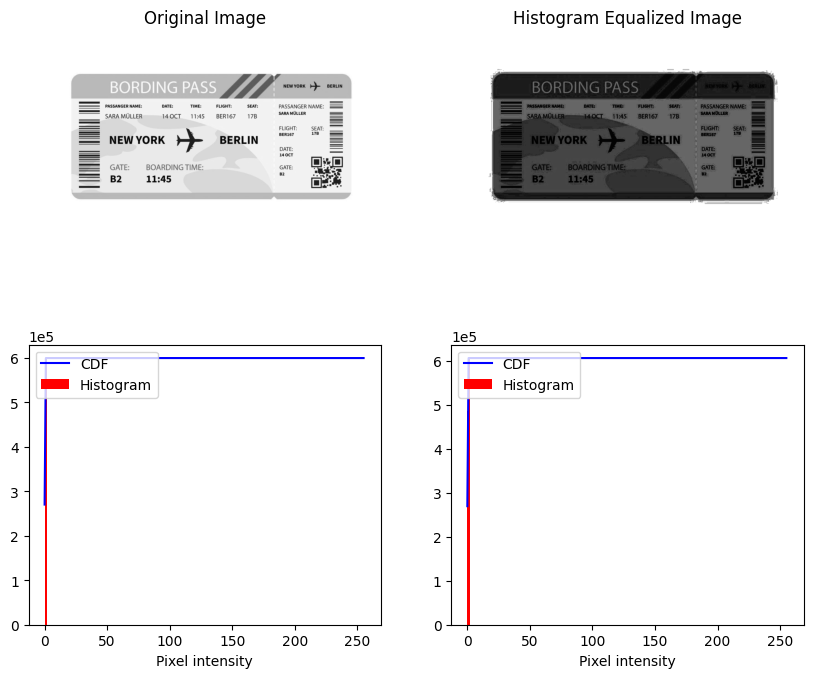

In [22]:
image = imread('/content/boarding_pass.jpg')  # Load an image
image_gray = rgb2gray(image)  # Convert to grayscale if necessary

# Apply global histogram equalization
image_eq = exposure.equalize_hist(image_gray)

# Plotting original and equalized image and histograms
fig, axes = plt.subplots(2, 2, figsize=(10, 8))
plot_image_and_hist(image_gray, axes[:, 0])
plot_image_and_hist(image_eq, axes[:, 1])

axes[0, 0].set_title('Original Image')
axes[0, 1].set_title('Histogram Equalized Image')
plt.show()

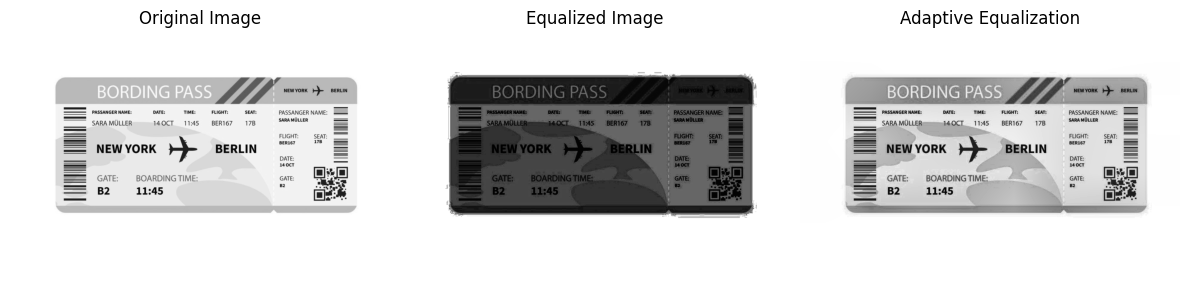

In [20]:
# Applying Adaptive Histogram Equalization
image_adapteq = exposure.equalize_adapthist(image_gray, clip_limit=0.03)

# Plotting the result
fig, axes = plt.subplots(1, 3, figsize=(12, 4), sharex=True, sharey=True)
axes[0].imshow(image_gray, cmap=plt.cm.gray)
axes[0].set_title('Original Image')
axes[1].imshow(image_eq, cmap=plt.cm.gray)
axes[1].set_title('Equalized Image')
axes[2].imshow(image_adapteq, cmap=plt.cm.gray)
axes[2].set_title('Adaptive Equalization')
for ax in axes:
    ax.axis('off')
plt.tight_layout()
plt.show()

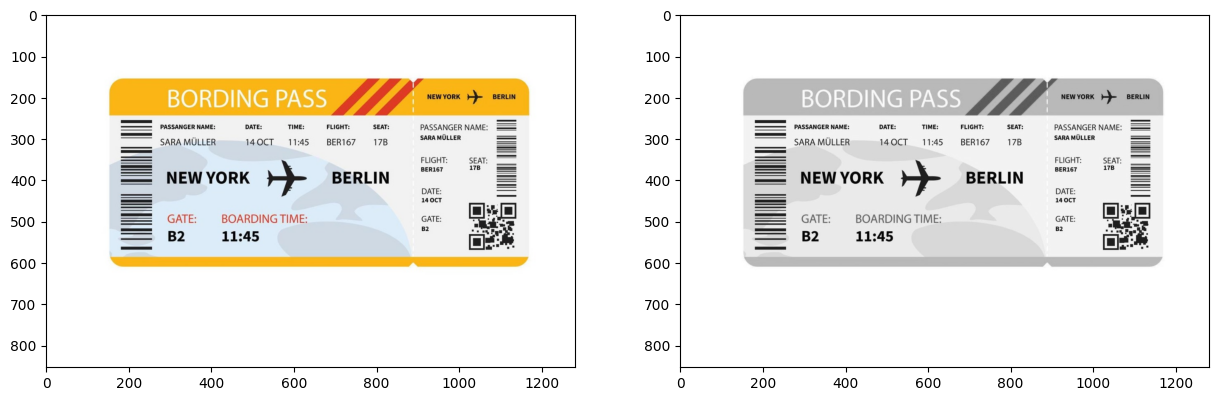

In [24]:
# Importing Necessary Libraries
from skimage import data
from skimage.color import rgb2gray
import matplotlib.pyplot as plt

# Setting the plot size to 15,15
plt.figure(figsize=(15, 15))

# Sample Image of scikit-image package
image = imread('/content/boarding_pass.jpg')
plt.subplot(1, 2, 1)

# Displaying the sample image
plt.imshow(image)

# Converting RGB image to Monochrome
gray_coffee = rgb2gray(image)
plt.subplot(1, 2, 2)

# Displaying the sample image - Monochrome
# Format
plt.imshow(gray_coffee, cmap="gray")


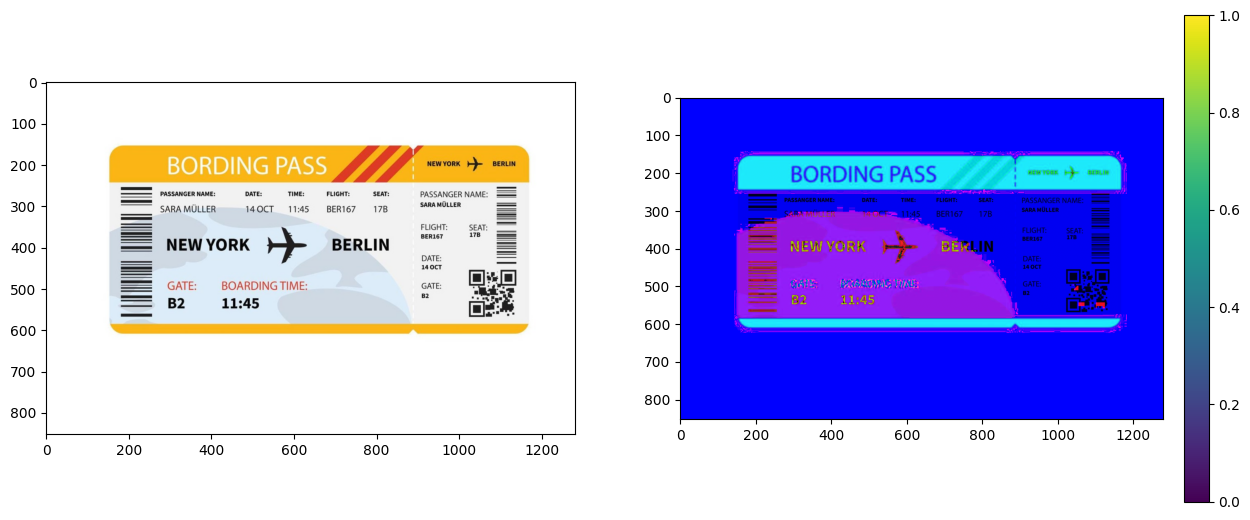

In [25]:
# Importing Necessary Libraries
from skimage import data
from skimage.color import rgb2hsv
import matplotlib.pyplot as plt

# Setting the plot size to 15,15
plt.figure(figsize=(15, 15))

# Sample Image of scikit-image package
image = imread('/content/boarding_pass.jpg')
plt.subplot(1, 2, 1)

# Displaying the sample image
plt.imshow(image)

# Converting RGB Image to HSV Image
hsv_coffee = rgb2hsv(image)
plt.subplot(1, 2, 2)

# Displaying the sample image - HSV Format
hsv_coffee_colorbar = plt.imshow(hsv_coffee)

# Adjusting colorbar to fit the size of the image
plt.colorbar(hsv_coffee_colorbar, fraction=0.046, pad=0.04)


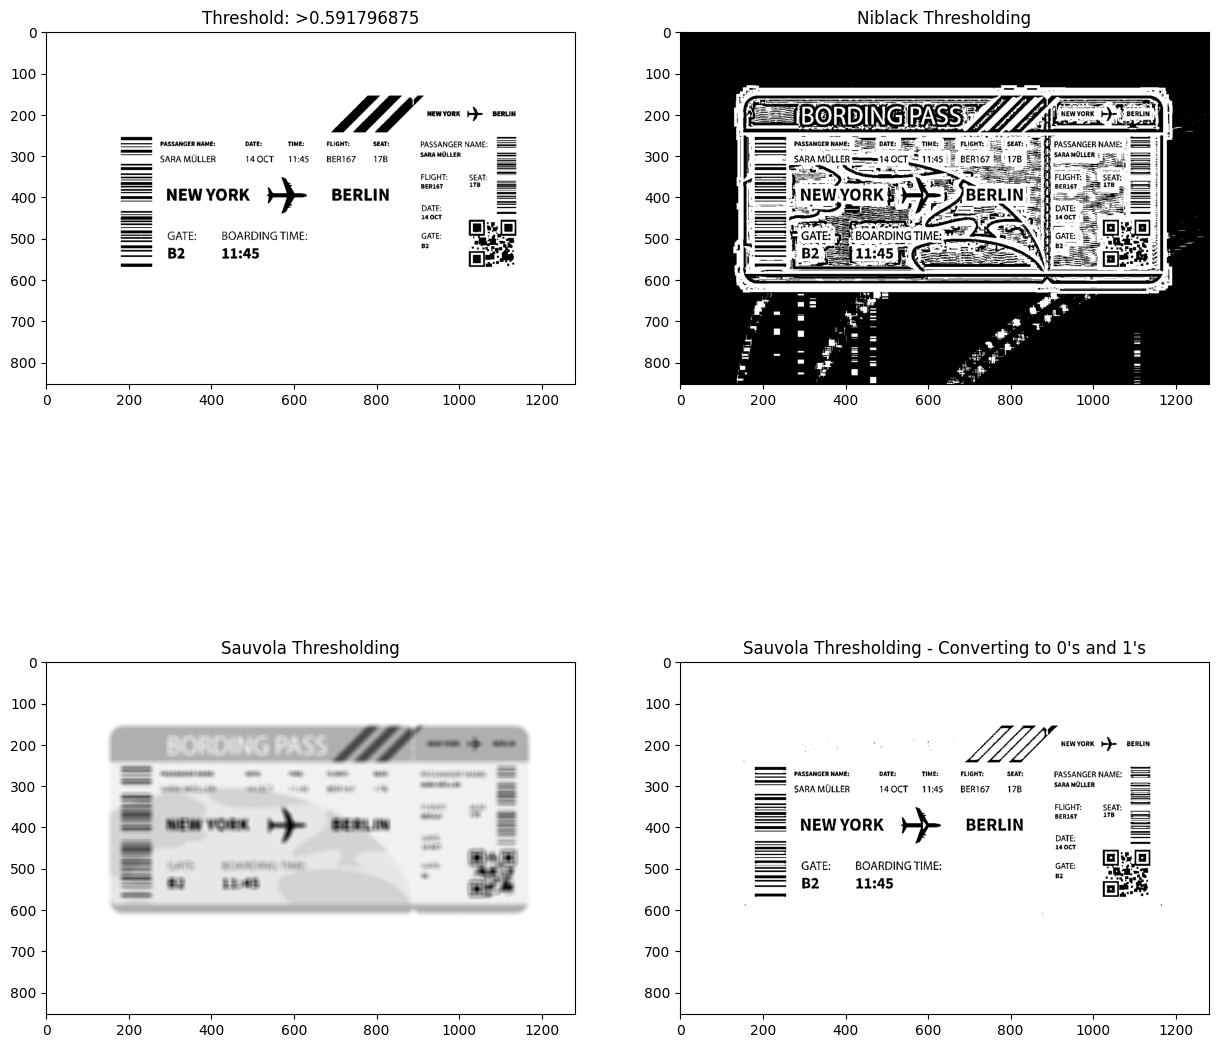

In [27]:
# Importing necessary libraries
from skimage import data
from skimage import filters
from skimage.color import rgb2gray
import matplotlib.pyplot as plt

# Setting plot size to 15, 15
plt.figure(figsize=(15, 15))

# Sample Image of scikit-image package
coffee=imread('/content/boarding_pass.jpg')
gray_coffee = rgb2gray(coffee)

# Computing Otsu's thresholding value
threshold = filters.threshold_otsu(gray_coffee)

# Computing binarized values using the obtained
# threshold
binarized_coffee = (gray_coffee > threshold)*1
plt.subplot(2,2,1)
plt.title("Threshold: >"+str(threshold))

# Displaying the binarized image
plt.imshow(binarized_coffee, cmap = "gray")

# Computing Ni black's local pixel
# threshold values for every pixel
threshold = filters.threshold_niblack(gray_coffee)

# Computing binarized values using the obtained
# threshold
binarized_coffee = (gray_coffee > threshold)*1
plt.subplot(2,2,2)
plt.title("Niblack Thresholding")

# Displaying the binarized image
plt.imshow(binarized_coffee, cmap = "gray")

# Computing Sauvola's local pixel threshold
# values for every pixel - Not Binarized
threshold = filters.threshold_sauvola(gray_coffee)
plt.subplot(2,2,3)
plt.title("Sauvola Thresholding")

# Displaying the local threshold values
plt.imshow(threshold, cmap = "gray")

# Computing Sauvola's local pixel
# threshold values for every pixel - Binarized
binarized_coffee = (gray_coffee > threshold)*1
plt.subplot(2,2,4)
plt.title("Sauvola Thresholding - Converting to 0's and 1's")

# Displaying the binarized image
plt.imshow(binarized_coffee, cmap = "gray")
